## Step 1. Import the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mpt

## Step 2. Import the dataset occupation.csv from the folder


In [70]:
df =pd.read_csv('Occupation.csv', sep='|')
df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


##  Step 3. Assign it to a variable called users.


In [13]:
users = df
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


<Axes: >

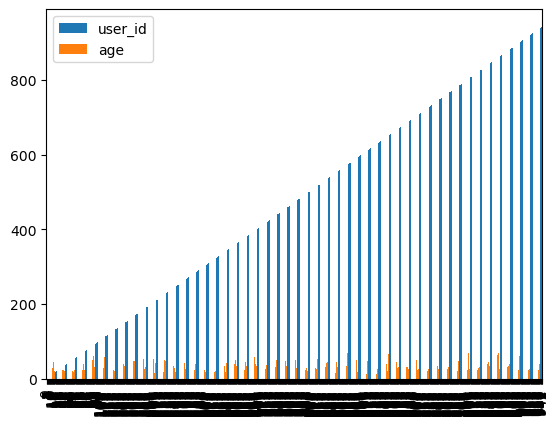

In [47]:
users.plot(kind='bar')

## Step 4. Discover what is the mean age per occupation


In [ ]:
users.groupby('occupation')['age'].mean()

# data = users[users['occupation'] == 'administrator']['age']
# val = data.sum()
# val/len(data)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

<Axes: xlabel='occupation'>

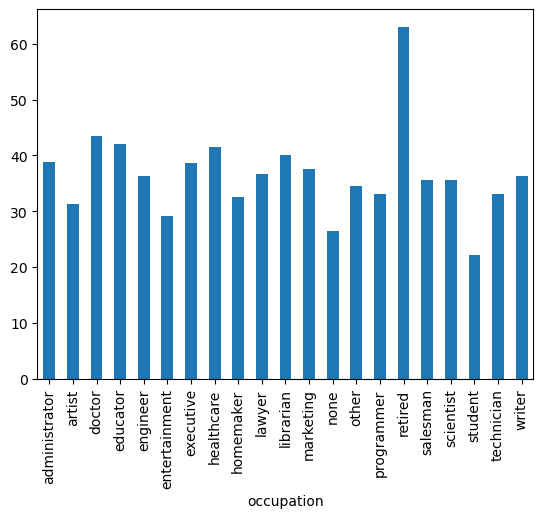

In [46]:
# users['age'].plot(kind='hist', bins=10)
users.groupby('occupation')['age'].mean().plot(kind='bar')


## Step 5. Discover the Male ratio per occupation and sort it from the most to the least.


In [93]:
# users.groupby('occupation')['gender'].value_counts()
# users.groupby('occupation')['gender'].value_counts().unstack()




users[users['gender'] == 'M'].groupby('occupation').size()


# users[users['gender'] == 'M'].groupby('occupation').size().plot(kind='bar',title='Male occupations')





occupation
administrator     43
artist            15
doctor             7
educator          69
engineer          65
entertainment     16
executive         29
healthcare         5
homemaker          1
lawyer            10
librarian         22
marketing         16
none               5
other             69
programmer        60
retired           13
salesman           9
scientist         28
student          136
technician        26
writer            26
dtype: int64

In [68]:
users.groupby('occupation')['gender'].value_counts().unstack()

gender,F,M
occupation,,
administrator,36.0,43.0
artist,13.0,15.0
doctor,NaN,7.0
educator,26.0,69.0
engineer,2.0,65.0
entertainment,2.0,16.0
executive,3.0,29.0
healthcare,11.0,5.0
homemaker,6.0,1.0


## Step 6. For each occupation, calculate the minimum and maximum ages


In [103]:
# users.groupby('occupation')['age'].value_counts()
users.groupby('occupation')['age'].agg(['min','max'])


,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


## Step 7. For each combination of occupation and gender, calculate the mean age


In [114]:
users.groupby(['occupation', 'gender'])['age'].mean()


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

## Step 8. For each occupation present the percentage of women and men

In [115]:
(users.groupby('occupation')['gender']
 .value_counts(normalize=True)
 .unstack()['M'] * 100
).sort_values(ascending=False)


occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: M, dtype: float64